# Data Preparation and Cleaning


In [1]:
library(tidyverse)

appData <- read_csv("R/mobile app project/AppleStore.csv")

head(appData)



Warning message:
"package 'tidyverse' was built under R version 3.4.4"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.4
v tidyr   0.8.1     v stringr 1.3.0
v readr   1.1.1     v forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'tibble' was built under R version 3.4.4"Warning message:
"package 'tidyr' was built under R version 3.4.4"Warning message:
"package 'readr' was built under R version 3.4.4"Warning message:
"package 'purrr' was built under R version 3.4.4"Warning message:
"package 'stringr' was built under R version 3.4.4"Warning message:
"package 'forcats' was built under R version 3.4.4"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column 

X1,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shopping",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1


Now I want to remove unwanted variables and check the variable type of each.

In [2]:
clean_app_data <- appData %>%
                      select(2:13)
str(clean_app_data)

Classes 'tbl_df', 'tbl' and 'data.frame':	7197 obs. of  12 variables:
 $ id              : int  281656475 281796108 281940292 282614216 282935706 283619399 283646709 284035177 284666222 284736660 ...
 $ track_name      : chr  "PAC-MAN Premium" "Evernote - stay organized" "WeatherBug - Local Weather, Radar, Maps, Alerts" "eBay: Best App to Buy, Sell, Save! Online Shopping" ...
 $ size_bytes      : int  100788224 158578688 100524032 128512000 92774400 10485713 227795968 130242560 49250304 70023168 ...
 $ currency        : chr  "USD" "USD" "USD" "USD" ...
 $ price           : num  3.99 0 0 0 0 0.99 0 0 9.99 3.99 ...
 $ rating_count_tot: int  21292 161065 188583 262241 985920 8253 119487 1126879 1117 7885 ...
 $ rating_count_ver: int  26 26 2822 649 5320 5516 879 3594 4 40 ...
 $ user_rating     : num  4 4 3.5 4 4.5 4 4 4 4.5 4 ...
 $ user_rating_ver : num  4.5 3.5 4.5 4.5 5 4 4.5 4.5 5 4 ...
 $ ver             : chr  "6.3.5" "8.2.2" "5.0.0" "5.10.0" ...
 $ cont_rating     : chr  "4+" "4+"

# Data Analysis
## Exploring the different genres of mobile apps

What are the most common app genres?


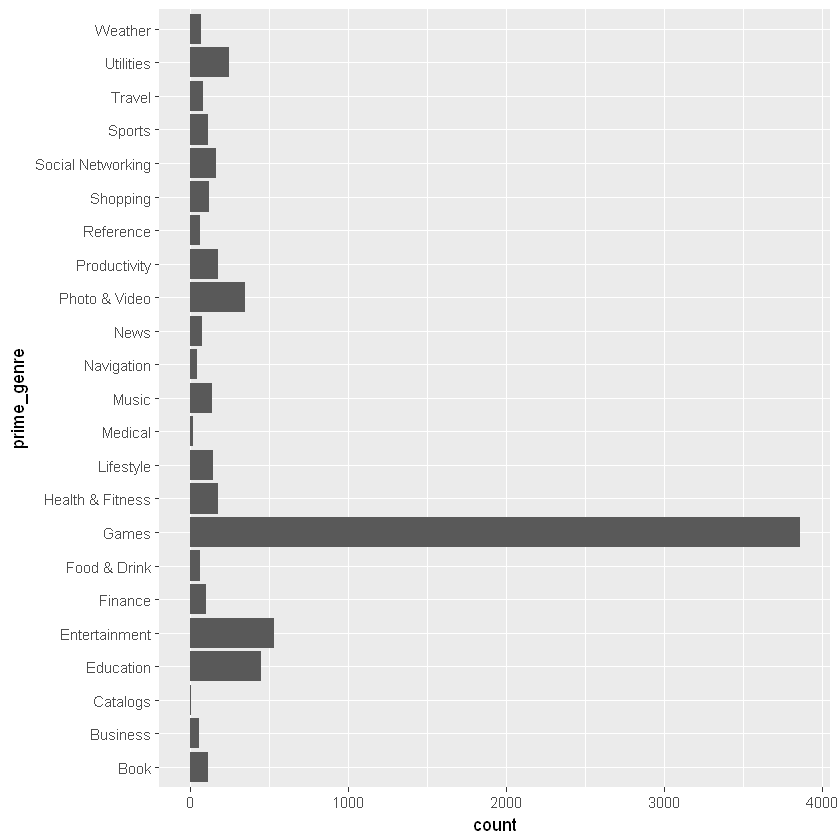

In [18]:
genre_count <- clean_app_data %>% 
                count(prime_genre) %>%
                arrange(desc(n))

ggplot(genre_count , aes(prime_genre, weight = n)) + geom_bar() + coord_flip()

Which genres cost the most?

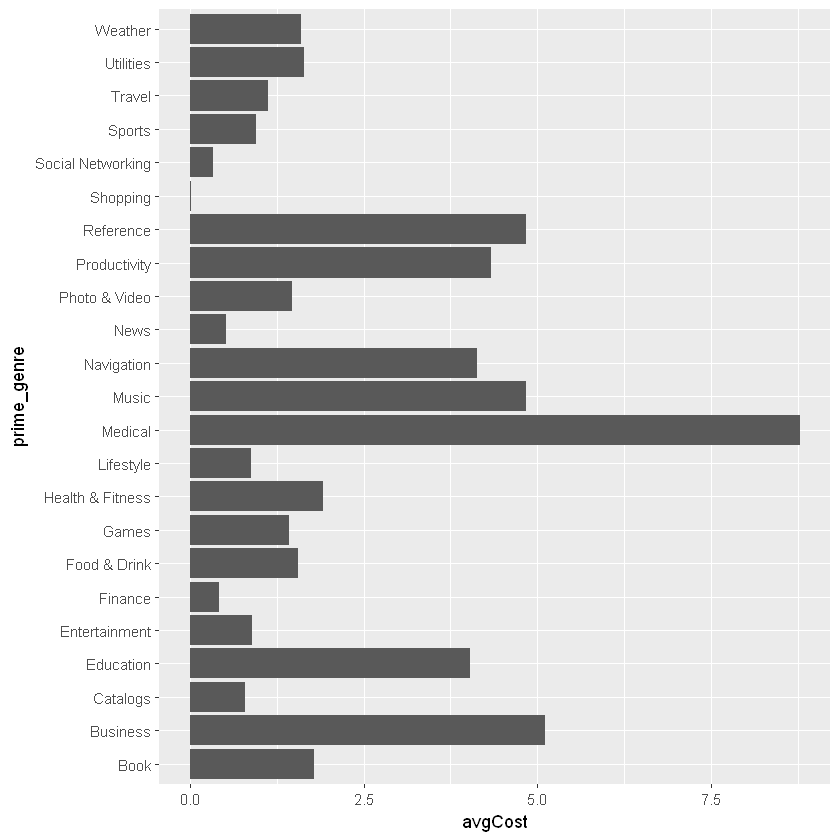

In [11]:
avg_cost <- clean_app_data %>%
              group_by(prime_genre) %>%
              summarize(avgCost = mean(price))
ggplot(avg_cost, aes(x = prime_genre, y = avgCost)) + geom_col() +coord_flip()

Which genres have the highest average rating?

I filtered out those apps where the number of ratings was less than the average number of ratings. This was done to disregard those apps that are newer and don't have enough ratings to draw conclusions.

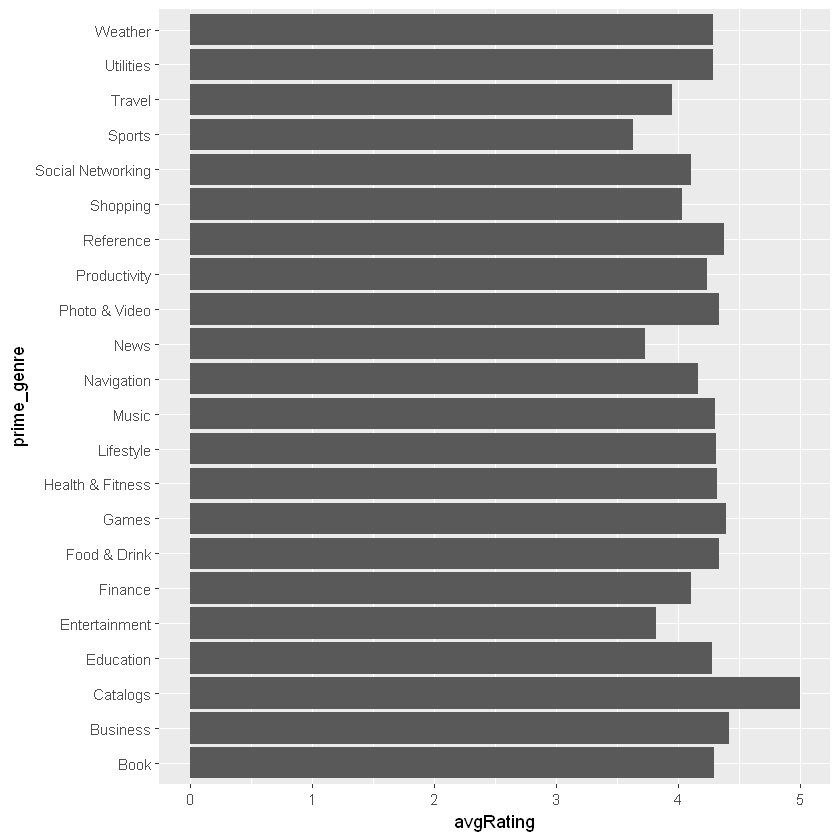

In [17]:
avg_rating <- clean_app_data %>%
              filter(rating_count_tot > mean(rating_count_tot)) %>%
              group_by(prime_genre) %>%
              summarize(avgRating = mean(user_rating))
ggplot(avg_rating, aes(x = prime_genre, y = avgRating)) + geom_col() +coord_flip()

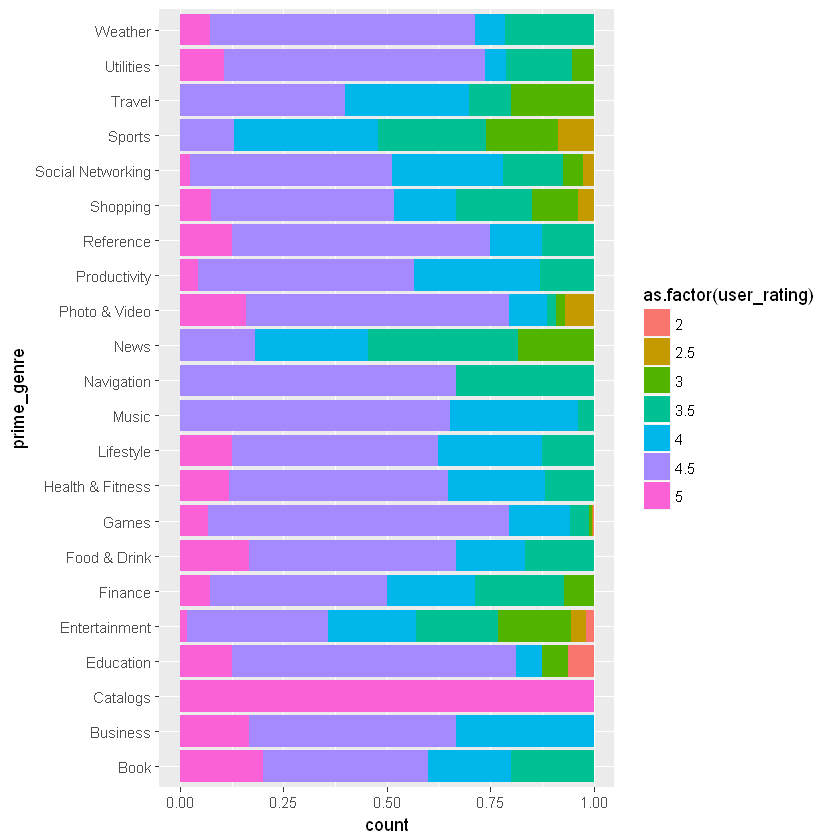

In [19]:
rating_breakdown_genre <- clean_app_data %>%
                              filter(rating_count_tot > mean(rating_count_tot)) %>%
                              group_by(prime_genre, user_rating) %>%
                              summarize(count=n()) %>%
                              arrange(prime_genre, user_rating) %>%
                              collect()
ggplot(rating_breakdown_genre, aes(x=prime_genre, y=count, fill=as.factor(user_rating))) +
  geom_bar(stat="identity", position = "fill") +
    coord_flip() 

Which genres are mostly free apps? 

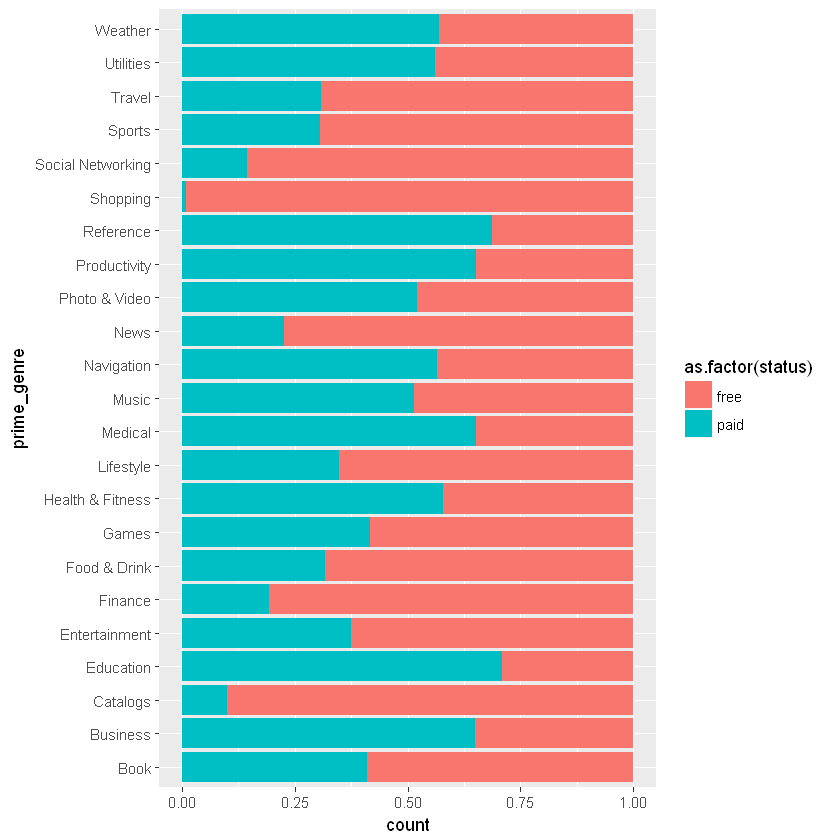

In [14]:
price_status <- clean_app_data %>% 
                mutate(status = ifelse(price == 0, "free", "paid"))

price_breakdown_genre <- price_status %>%
                          group_by(prime_genre, status) %>%
                          summarize(count=n()) %>%
                          arrange(prime_genre,status) %>%
                          collect()

ggplot(price_breakdown_genre, aes(x=prime_genre, y=count, fill=as.factor(status))) +
  geom_bar(stat="identity", position = "fill") +
  coord_flip()

What are the different content ratings of each genre?

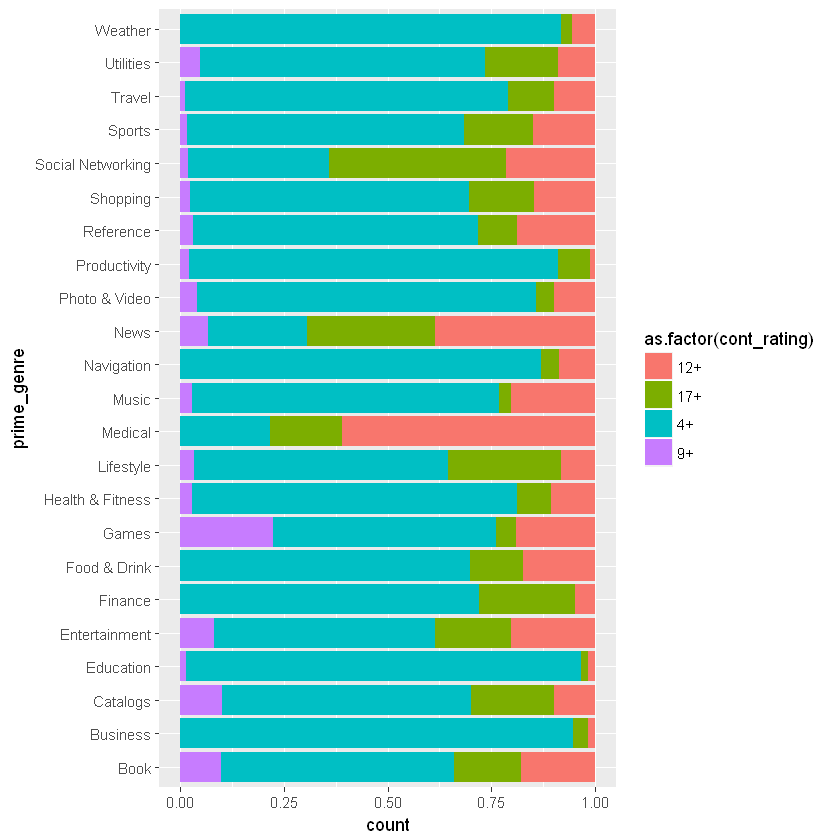

In [15]:
content_breakdown_genre <- clean_app_data %>%
                            group_by(prime_genre, cont_rating) %>%
                            summarize(count = n()) %>%
                            arrange(prime_genre, cont_rating) %>%
                            collect()



ggplot(content_breakdown_genre, aes(x=prime_genre, y=count, fill=as.factor(cont_rating))) +
  geom_bar(stat="identity", position = "fill") +
  coord_flip()


In [ ]:
## highest number of votes vs avg rating